# About the Dataset.
- Dataset consists of 2000 records and 8 columns:-
- Customer ID 
- Gender 
- Age
- Annual Income
- Spending Score - Score assigned by the shop, based on customer behavior and spending nature
- Profession
- Work Experience - in years
- Family Size

- https://www.kaggle.com/datasets/datascientistanna/customers-dataset

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Collecting the Data.

In [2]:
df=pd.read_excel('customer.xlsx')

In [3]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


#### Checking shape of the data.

In [4]:
df.shape

(2000, 8)

#### Collecting Information about the Data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

## Cleaning Of the Data.

#### Checking Null Values.

In [8]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

- Profession Column have 35 null values so we have to deal with these null Values.

#### Dealing with Null Values.

In [9]:
df['Profession'].fillna(method='ffill',inplace=True)

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

- These is no null values can be exist in our data.

#### Checking Duplicate Values.

In [11]:
df.duplicated().sum()

0

- There is No Duplicate Value in our data.

#### Dropping Unnecessary Columns.

In [12]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [13]:
df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [14]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


In [15]:
df.tail()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2
1999,Male,90,110610,52,Entertainment,5,2


In [16]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [17]:
df.corr()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.021378,-0.041798,-0.014319,0.038254
Annual Income ($),0.021378,1.000000,0.023299,0.089136,0.093005
Spending Score (1-100),-0.041798,0.023299,1.000000,-0.028948,0.002232
Work Experience,-0.014319,0.089136,-0.028948,1.000000,0.011873
Family Size,0.038254,0.093005,0.002232,0.011873,1.000000


#### Checking Unique Values in Our Data.

In [18]:
df.nunique()

Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

#### Operating Some Statistical Operations on the Data.

In [19]:
df['Annual Income ($)'].min()

0

In [20]:
df['Annual Income ($)'].max()

189974

In [21]:
df['Profession'].value_counts()

Artist           622
Healthcare       349
Entertainment    236
Engineer         182
Doctor           163
Executive        155
Lawyer           143
Marketing         88
Homemaker         62
Name: Profession, dtype: int64

## EDA

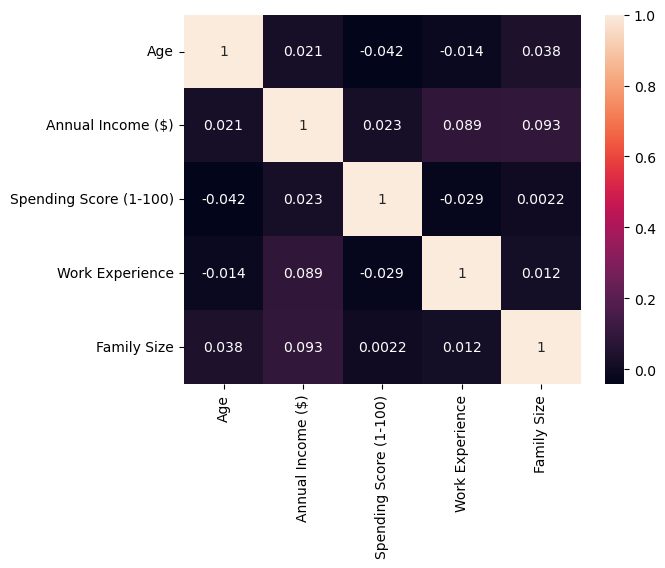

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

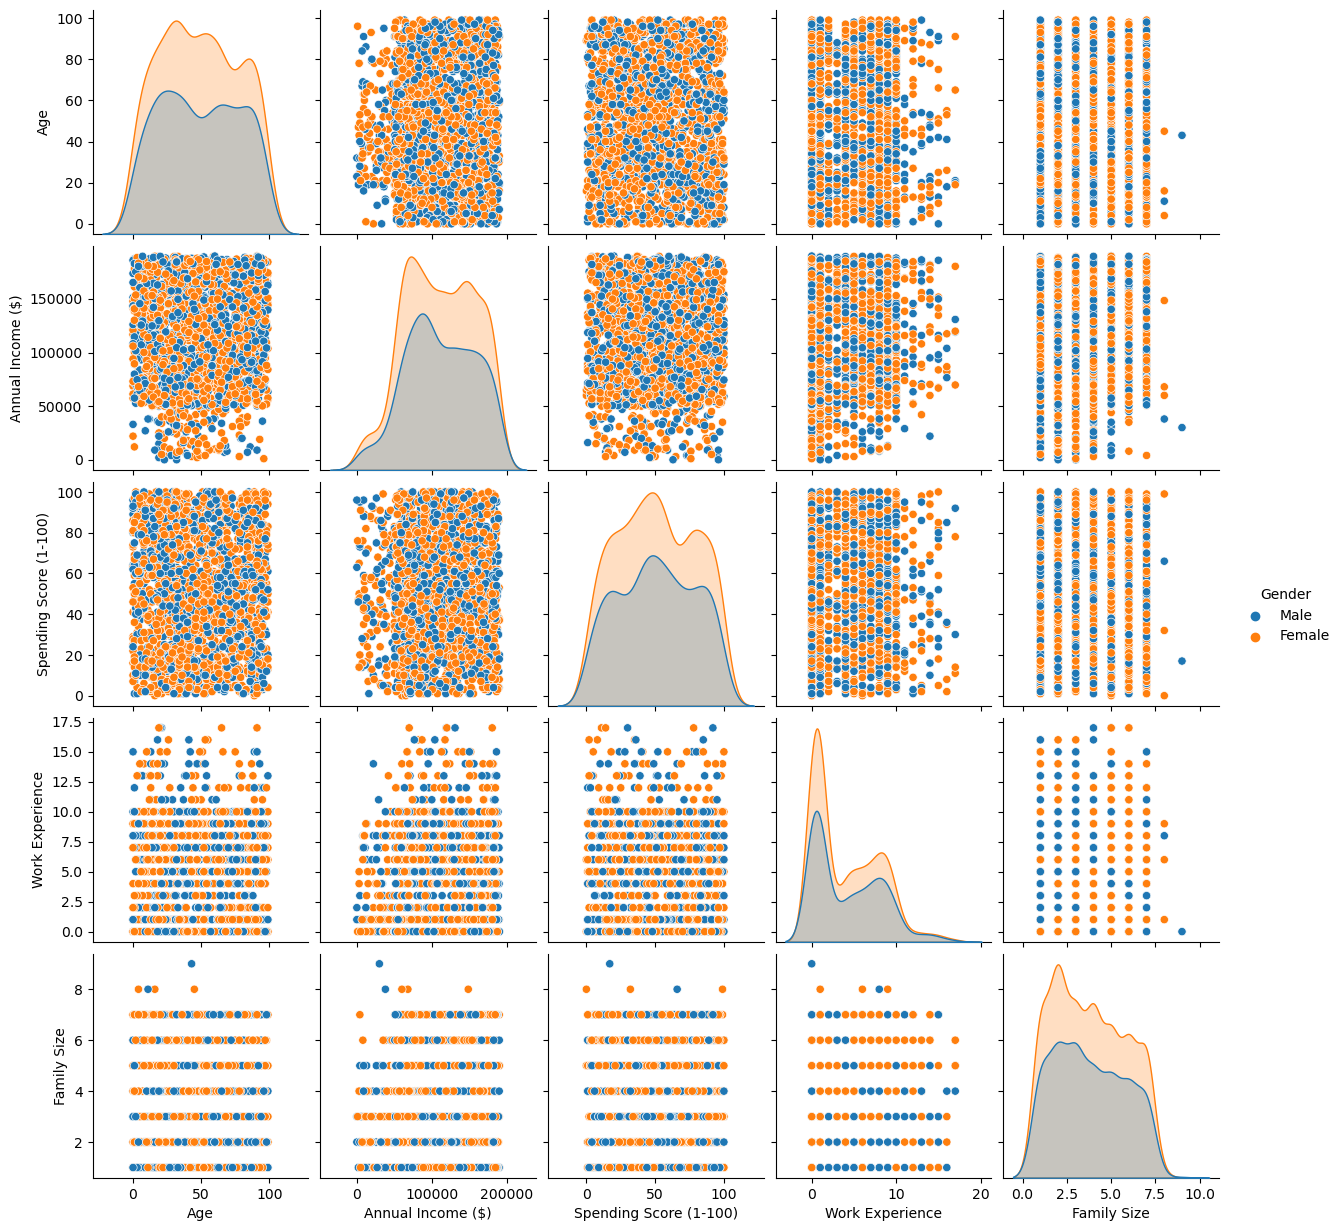

In [23]:
sns.pairplot(df,hue='Gender')
plt.show()


In [24]:
df_pivot = df.copy()

In [25]:
df_pivot

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [26]:
df['Gender'].value_counts()

Female    1186
Male       814
Name: Gender, dtype: int64

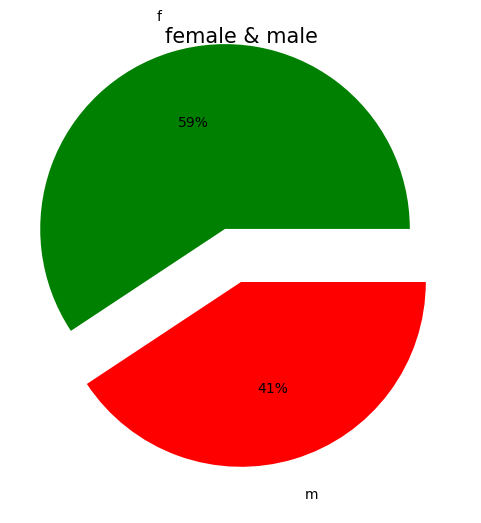

In [27]:
plt.figure(figsize=(6,6))

df.Gender.value_counts().plot(kind="pie",explode=[.3,0], autopct="%1.0f%%",labels=["f","m"],labeldistance=1.2
 , colors=["green","red"]                            )
plt.ylabel(None)
plt.title("female & male",fontsize=15 )
plt.show()

#### Finding the Mean,Median,Max and Mean in Gender and Annual Income.

In [28]:
df_pivot.pivot_table('Annual Income ($)',columns='Gender',aggfunc='mean')

Gender,Female,Male
Annual Income ($),110553.715008,110991.323096


In [29]:
ais=df_pivot.groupby(['Gender'])['Annual Income ($)'].mean().sort_values()

Gender
Female    110553.715008
Male      110991.323096
Name: Annual Income ($), dtype: float64


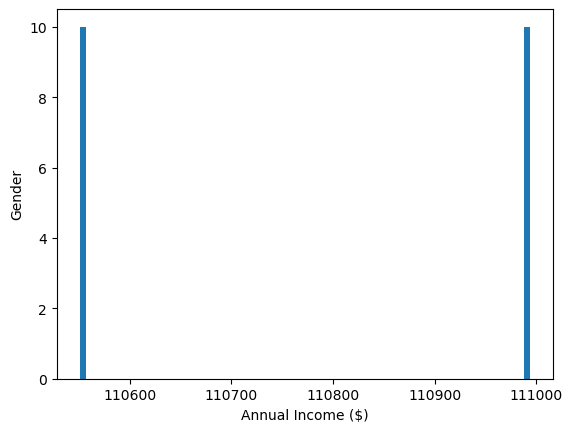

In [30]:
print(ais)
plt.bar(ais,height=10,width=6)
plt.xlabel('Annual Income ($)')
plt.ylabel('Gender')
plt.show()

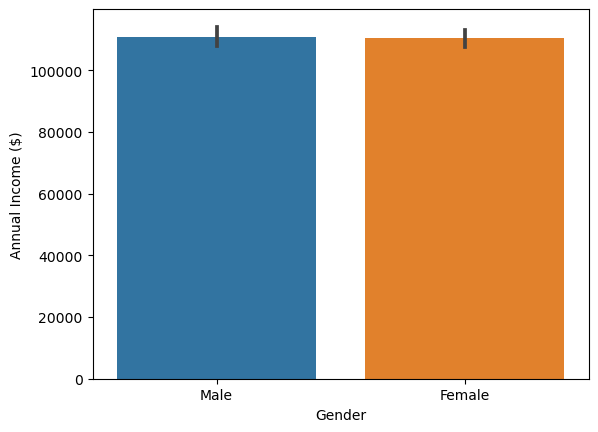

In [31]:
sns.barplot(data=df,x='Gender',y='Annual Income ($)')
plt.show()

In [32]:
df_pivot.pivot_table('Annual Income ($)',columns='Gender',aggfunc='max')

Gender,Female,Male
Annual Income ($),189974,189945


In [33]:
df_pivot.pivot_table('Annual Income ($)',columns='Gender',aggfunc='min')

Gender,Female,Male
Annual Income ($),1000,0


In [34]:
df_pivot.pivot_table('Annual Income ($)',columns='Gender',aggfunc='median')

Gender,Female,Male
Annual Income ($),111174,108055


#### Finding Mean,Median,Max and Mean in According to Profession and AnnualIncome.

In [35]:
df_pivot.pivot_table('Annual Income ($)',columns='Profession',aggfunc='min')

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Annual Income ($),0,0,7000,1000,4000,3000,29000,3000,5000


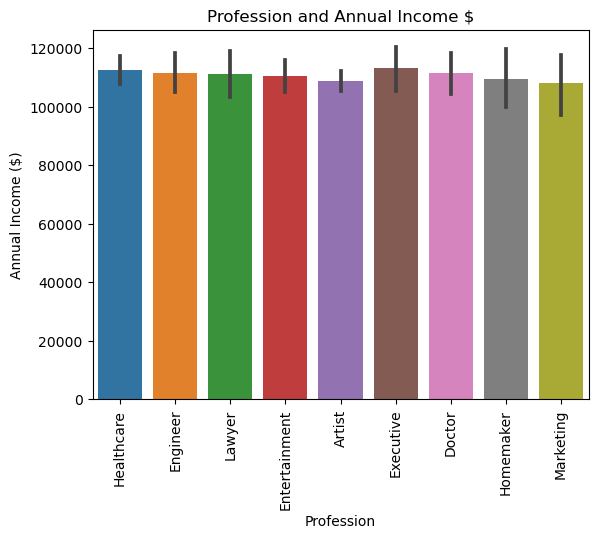

In [36]:
sns.barplot(data=df,x='Profession',y='Annual Income ($)')
plt.xticks(rotation=90)
plt.title('Profession and Annual Income $')
plt.show()

In [37]:
df_pivot.pivot_table('Annual Income ($)',columns='Profession',aggfunc='max')

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Annual Income ($),189709,189672,189974,186882,189630,189689,188696,189650,186069


In [38]:
df_pivot.pivot_table('Annual Income ($)',columns='Profession',aggfunc='median')

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Annual Income ($),105211.0,111871.0,114260.0,109446.0,112247.0,111859.0,105834.5,113460.0,118829.0


In [39]:
df_pivot.pivot_table('Annual Income ($)',columns='Profession',aggfunc='mean')

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Annual Income ($),108907.92926,111463.06135,111659.208791,110686.800847,113178.935484,112783.679083,109704.806452,111172.503497,108031.431818


In [40]:
df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


#### Checking Unique Values in Work Experience.

In [41]:
df['Work Experience'].nunique()

18

#### Checking How Many Peoples are Connected To Their Profession.

In [42]:
df['Profession'].value_counts()

Artist           622
Healthcare       349
Entertainment    236
Engineer         182
Doctor           163
Executive        155
Lawyer           143
Marketing         88
Homemaker         62
Name: Profession, dtype: int64

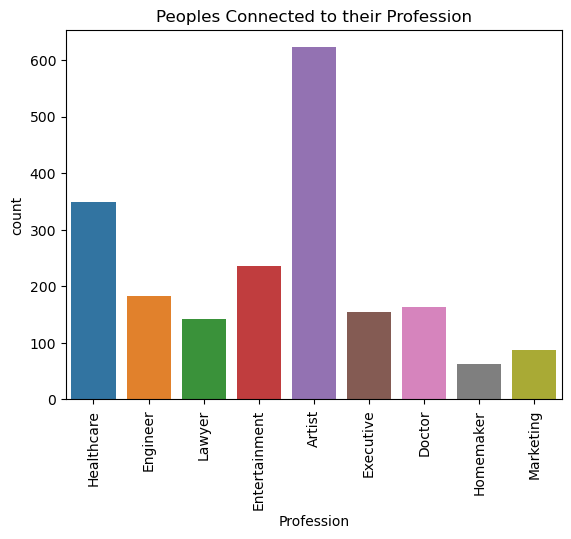

In [43]:
sns.countplot(x=df['Profession'])
plt.xticks(rotation=90)
plt.title('Peoples Connected to their Profession')
plt.show()

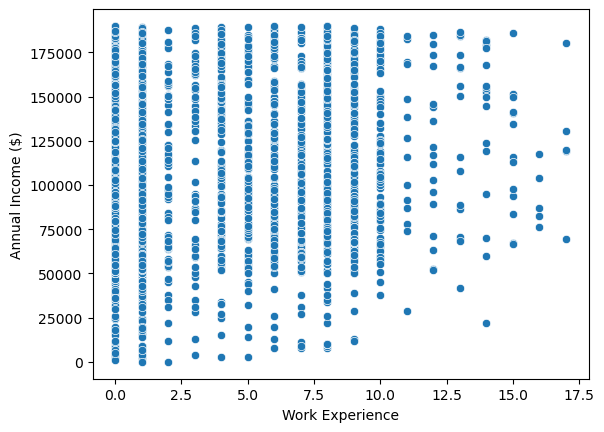

In [44]:
# Seeing the relationship between Work Experience and Annual Income$.
sns.scatterplot(df['Work Experience'],df['Annual Income ($)'])
plt.show()

#### Finding Howmany Male or Female connected to which Profession.

In [45]:
crosstb = pd.crosstab(df['Profession'],df['Gender'])
crosstb

Gender,Female,Male
Profession,,
Artist,386,236
Doctor,90,73
Engineer,106,76
Entertainment,135,101
Executive,89,66
Healthcare,200,149
Homemaker,40,22
Lawyer,86,57
Marketing,54,34


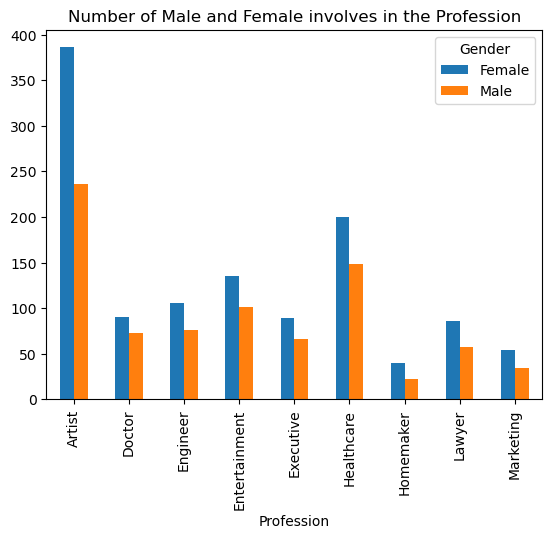

In [46]:
crosstb.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.title('Number of Male and Female involves in the Profession')
plt.show()

In [47]:
df_group = df.copy()

In [48]:
df_group

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


#### - Finding How Many Male and Female have Annual Income in different Profession.

In [49]:
df_res = df_group.groupby(['Profession','Gender'])['Annual Income ($)'].mean().reset_index()

In [50]:
df_res

,Profession,Gender,Annual Income ($)
0,Artist,Female,108203.261658
1,Artist,Male,110060.478814
2,Doctor,Female,109122.700000
3,Doctor,Male,114348.438356
4,Engineer,Female,109428.084906
5,Engineer,Male,114771.039474
6,Entertainment,Female,108997.066667
7,Entertainment,Male,112945.356436
8,Executive,Female,117658.123596
9,Executive,Male,107138.818182


<Figure size 1000x1400 with 0 Axes>

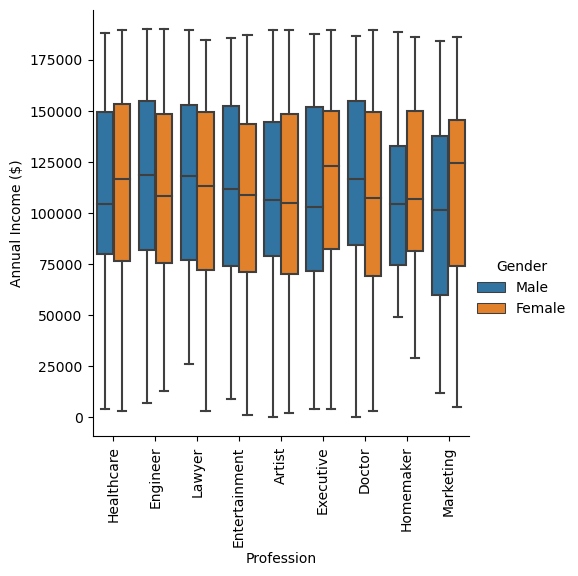

In [51]:
plt.figure(figsize=(10,14))
sns.catplot(data=df, x="Profession", y="Annual Income ($)", hue="Gender", kind="box")
plt.xticks(rotation=90)
plt.show()

In [52]:
df['Work Experience'].nunique()

18

#### - Finding howmany Male and Female haveing Annual Income and Work Experience in differnt Profession.

In [53]:
df_res1 = df_group.groupby(['Profession','Gender'])['Annual Income ($)','Work Experience'].mean()

In [54]:
df_res1

Annual Income ($)  Work Experience
Profession    Gender                                    
Artist        Female      108203.261658         4.202073
              Male        110060.478814         4.300847
Doctor        Female      109122.700000         3.944444
              Male        114348.438356         4.794521
Engineer      Female      109428.084906         4.009434
              Male        114771.039474         3.802632
Entertainment Female      108997.066667         3.570370
              Male        112945.356436         3.455446
Executive     Female      117658.123596         4.191011
              Male        107138.818182         4.439394
Healthcare    Female      114602.200000         3.785000
              Male        110342.711409         4.214765
Homemaker     Female      111208.450000         6.100000
              Male        106970.909091         6.181818
Lawyer        Female      109003.825581         3.604651
              Male        114444.543860         3.350877
Marketing     Female      111121.166667         4.037037
              Male        103124.205882         4.941176

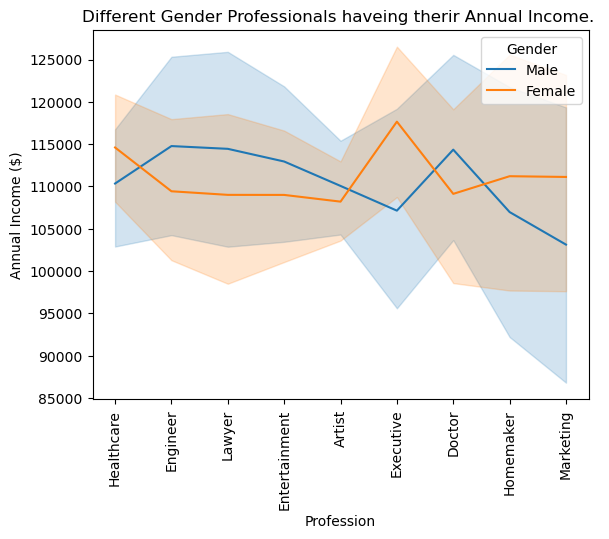

In [55]:

sns.lineplot(data=df, x="Profession", y="Annual Income ($)", hue="Gender")
plt.xticks(rotation=90)
plt.title('Different Gender Professionals haveing therir Annual Income. ')
plt.show()

#### - Finding the Male and Female haveing No Work Experience with Annual Income according to their Profession.

In [56]:
df_res2 = df_group.groupby(['Profession','Gender'])['Annual Income ($)','Work Experience'].min()

In [57]:
df_res2

Annual Income ($)  Work Experience
Profession    Gender                                    
Artist        Female               2000                0
              Male                    0                0
Doctor        Female               3000                0
              Male                    0                0
Engineer      Female              13000                0
              Male                 7000                0
Entertainment Female               1000                0
              Male                 9000                0
Executive     Female               4000                0
              Male                 4000                0
Healthcare    Female               3000                0
              Male                 4000                0
Homemaker     Female              29000                0
              Male                49000                0
Lawyer        Female               3000                0
              Male                26000                0
Marketing     Female               5000                0
              Male                12000                0

#### - Finding the Male and Female haveing Maximum Work Experience with Annual Income according to their Profession.

In [58]:
df_res3 = df_group.groupby(['Profession','Gender'])['Annual Income ($)','Work Experience'].max()

In [59]:
df_res3

Annual Income ($)  Work Experience
Profession    Gender                                    
Artist        Female             189446               17
              Male               189709               17
Doctor        Female             189672               15
              Male               186673               16
Engineer      Female             189974               16
              Male               189945               15
Entertainment Female             186882               14
              Male               185794               15
Executive     Female             189630               15
              Male               187545               16
Healthcare    Female             189689               16
              Male               188034               14
Homemaker     Female             185900               14
              Male               188696               12
Lawyer        Female             184815               17
              Male               189650               13
Marketing     Female             186069               15
              Male               184324               14

In [60]:
income=pd.pivot_table(data=df_group[['Gender','Profession','Annual Income ($)']],
                     index=['Gender','Profession'],
                     values=['Annual Income ($)'],
                     aggfunc='max')

In [61]:
income

Annual Income ($)
Gender Profession                      
Female Artist                    189446
       Doctor                    189672
       Engineer                  189974
       Entertainment             186882
       Executive                 189630
       Healthcare                189689
       Homemaker                 185900
       Lawyer                    184815
       Marketing                 186069
Male   Artist                    189709
       Doctor                    186673
       Engineer                  189945
       Entertainment             185794
       Executive                 187545
       Healthcare                188034
       Homemaker                 188696
       Lawyer                    189650
       Marketing                 184324

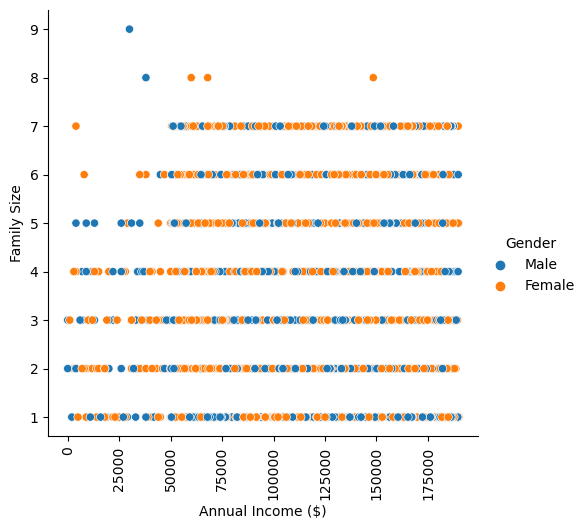

In [62]:
sns.relplot(x='Annual Income ($)',y='Family Size',hue='Gender',data=df)
plt.xticks(rotation=90)
plt.show()

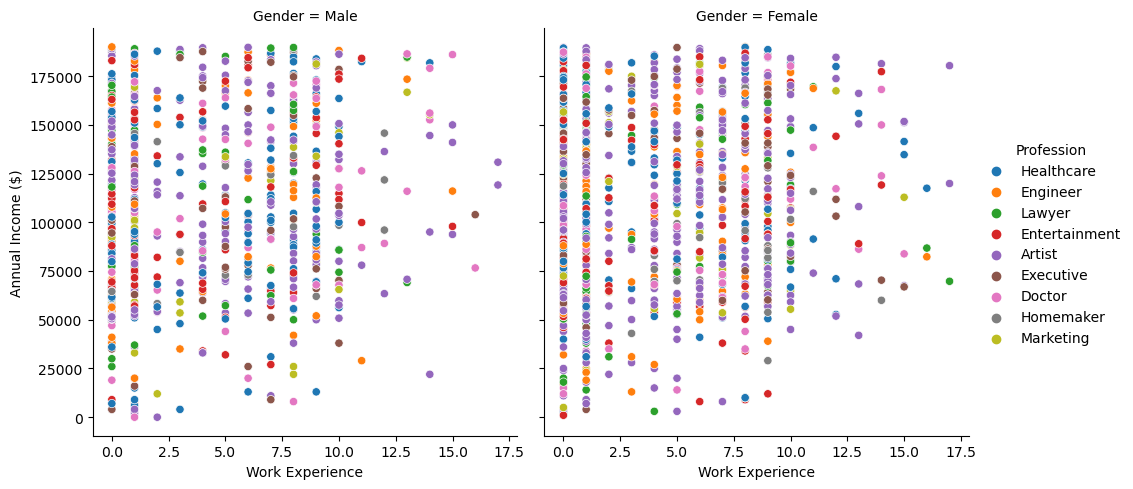

In [63]:
sns.relplot(x='Work Experience' ,y = 'Annual Income ($)',hue='Profession',col='Gender',data=df)
plt.show()

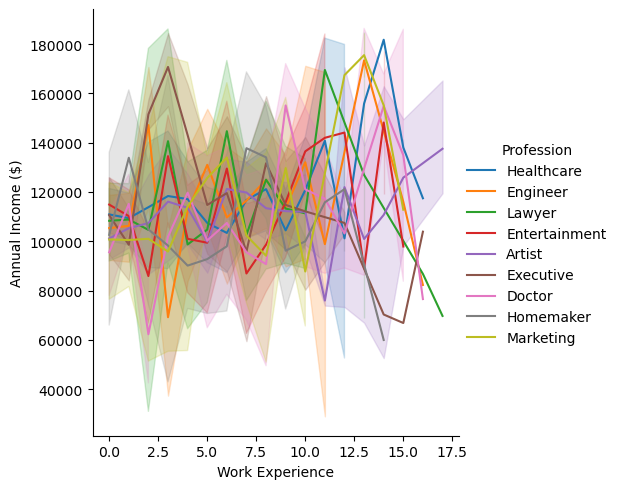

In [64]:
sns.relplot(x='Work Experience' ,y = 'Annual Income ($)',hue='Profession',kind='line',data=df)
plt.show()

## Conclusion:-

- In the dataset females are 59% and Male are 41%.
- In the Professions,622 peopels are connected to the Artist profession and also they have maximum Annual Income to other Professions.
- In any Profession Females are more active than Males.